## Importance measure in a graph
<li><b>Degree</b> having the highest</li>
<li><b>Proximity</b> those are close to another network.</li>
<li><b>shortest path</b>tend to connect other node in anetwrk</li>

## Centrality measure the importance
1.Degree centrality=D/N-1<br> 
2.closeness centrality

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
G=nx.karate_club_graph()
G=nx.convert_node_labels_to_integers(G,first_label=1)

In [3]:
node_size=[80*G.degree(v) for v in G.nodes()]
node_color=[G.degree(V) for V in G]
pos=nx.fruchterman_reingold_layout(G)

In [4]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['fruchterman_reingold_layout',
 'spring_layout',
 'circular_layout',
 'spectral_layout',
 'random_layout',
 'shell_layout']

## 1 Degree centrality

<IPython.core.display.Javascript object>


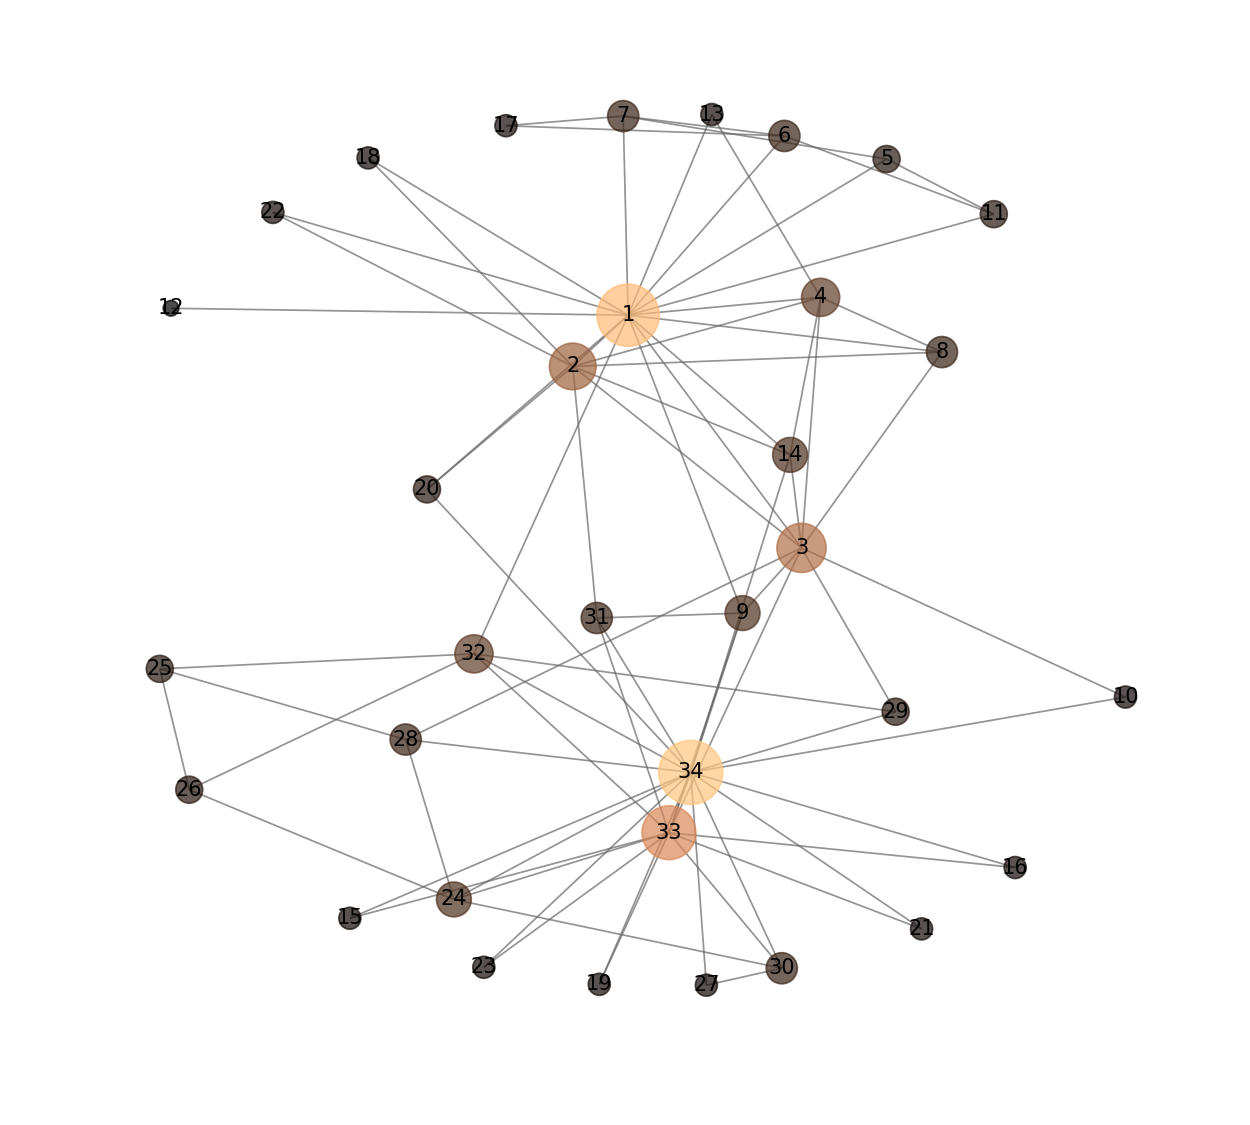

In [5]:

%matplotlib notebook
plt.figure(figsize=(10,9))
nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels= True, 
                   edge_color='.4', cmap=plt.cm.copper)

plt.axis('off')
plt.tight_layout();

In [7]:
deg_centrality=nx.degree_centrality(G)

In [8]:
deg_centrality[34],deg_centrality[33],deg_centrality[1]

(0.5151515151515151, 0.36363636363636365, 0.48484848484848486)

## 2 Closeness Centrality
C(u)=N-1/sum(distance(u,v) for all nodes in network)

In [9]:
nx_closenes_centrality=nx.closeness_centrality(G)

In [10]:
node_size1=[]
node_color1=[]
for v in nx_closenes_centrality:
    node_size1.append(1000*nx_closenes_centrality[v])
for v in nx_closenes_centrality:
    node_color1.append(10*nx_closenes_centrality[v])
    
    

<IPython.core.display.Javascript object>


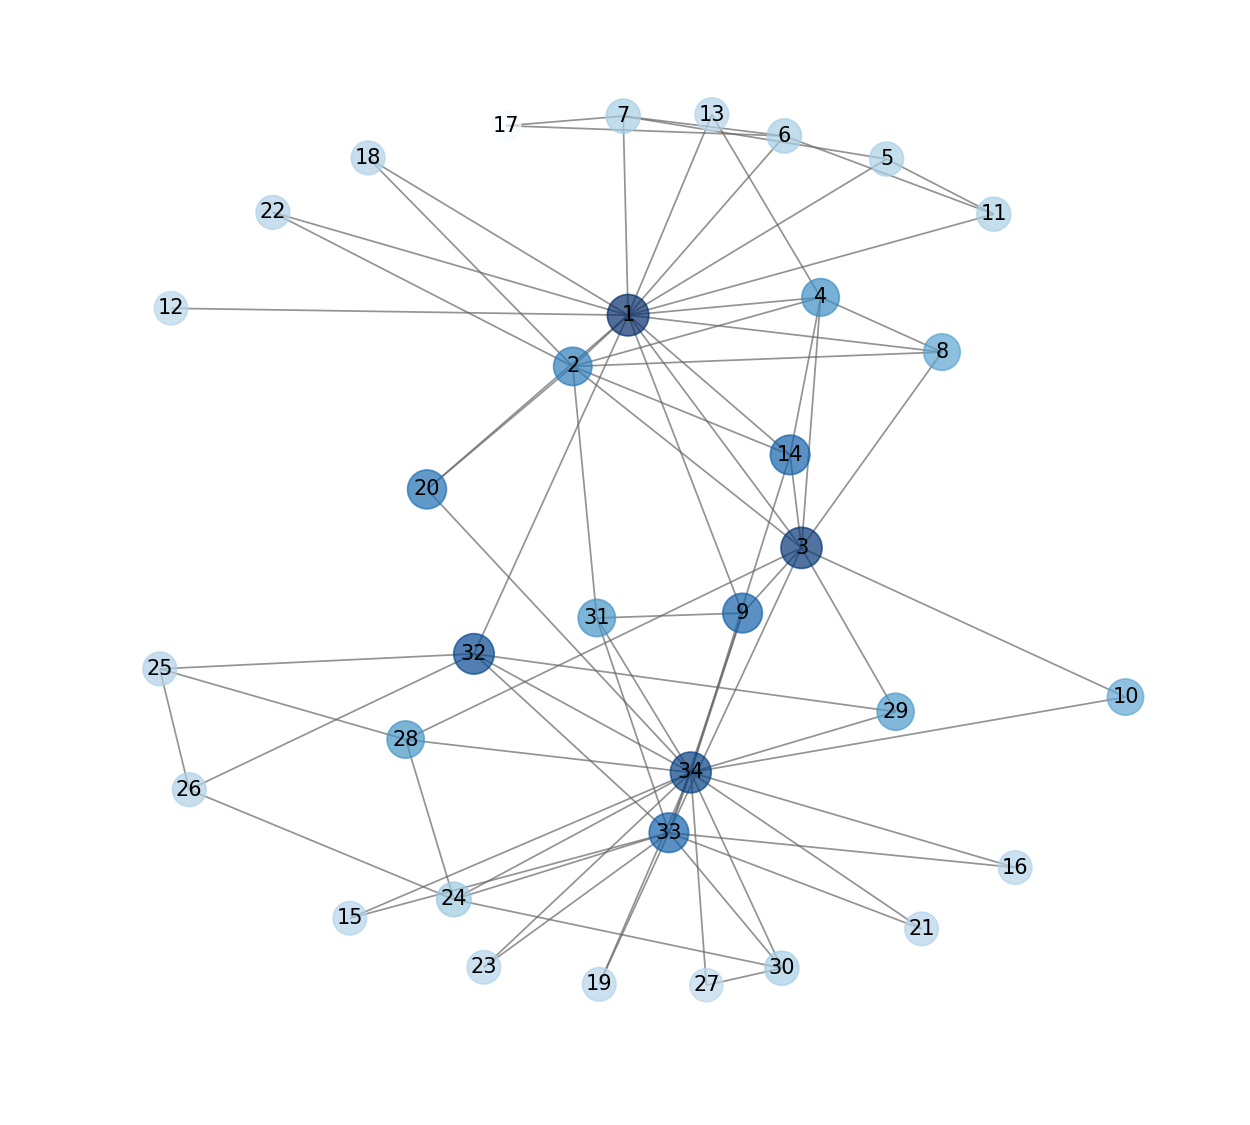

In [11]:
%matplotlib notebook
plt.figure(figsize=(10,9))
nx.draw_networkx(G, pos, node_size=node_size1, 
                 node_color=node_color1, alpha=0.7, with_labels= True, 
                   edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

###### calculation for centrality

In [12]:
nx_closenes_centrality[32]

0.5409836065573771

In [13]:
Distance=sum(nx.shortest_path_length(G,32).values())

In [14]:
node=G.number_of_nodes() -1

In [15]:
node/Distance

0.5409836065573771

#  3 what happen when node cant reach all other node:DISCONNECTED NODE
<b> closeness centrality(l)</b>= no of node l can reach/sum(distance(l,v)) l can reach v 
<b><i><u>problem is here</u></i><b> suppose 'l' can only reach 'm' therefore <br>
c(l)=1/1
<br>
that is highest any node can have this seems wrong

### solution to above situation
<b>node centrality C(L)= [no of node L can reach(R(L))/sum(distance(L,v)) L can reach v ]*[R(L)/(N-1)]

In [16]:
closecent=nx.closeness_centrality(G,normalized=True)

# 4 betweenness centrality
important node connect the other node<hr>
<br>
Cbet(v)=sum for all pair of nodes[no of shortest path(s,t) that contain v/ total no of shortest path between (s,t)]
<hr>
<br>
whether  to include or not include v while Cbet(v) calcluation to include as <b>end point

### Normalising betweeness centrality
when comparing two different network then normalise betweenness centrality since small network have small centrality than larger network.


In [17]:
BetC=nx.betweenness_centrality(G,normalized=True,endpoints=False)

In [18]:
import operator

In [19]:
#getting top 5 between_ness centrality
BetC_Sorted=sorted(BetC.items(),key=operator.itemgetter(1),reverse=True)[:5]

In [20]:
 BetC_Sorted

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.14524711399711399),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325)]

In [21]:
sorted?

In [22]:
BetC.items()

dict_items([(1, 0.43763528138528146), (2, 0.053936688311688304), (3, 0.14365680615680618), (4, 0.011909271284271283), (5, 0.0006313131313131313), (6, 0.02998737373737374), (7, 0.029987373737373736), (8, 0.0), (9, 0.05592682780182781), (10, 0.0008477633477633478), (11, 0.0006313131313131313), (12, 0.0), (13, 0.0), (14, 0.04586339586339586), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.03247504810004811), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.017613636363636363), (25, 0.0022095959595959595), (26, 0.0038404882154882154), (27, 0.0), (28, 0.02233345358345358), (29, 0.0017947330447330447), (30, 0.0029220779220779218), (31, 0.014411976911976907), (32, 0.13827561327561325), (33, 0.14524711399711399), (34, 0.30407497594997596)])

In [23]:
#visualisation
node_color2=[]
node_size2=[]
 
for v in BetC:
    if BetC[v]!=0:
        node_size2.append(100*BetC[v])
    else:
        node_size2.append(0.01)
for v in BetC:
    if BetC[v]!=0:
        node_color2.append(10*BetC[v])
    else:
        node_color2.append(0.01)
     

<IPython.core.display.Javascript object>


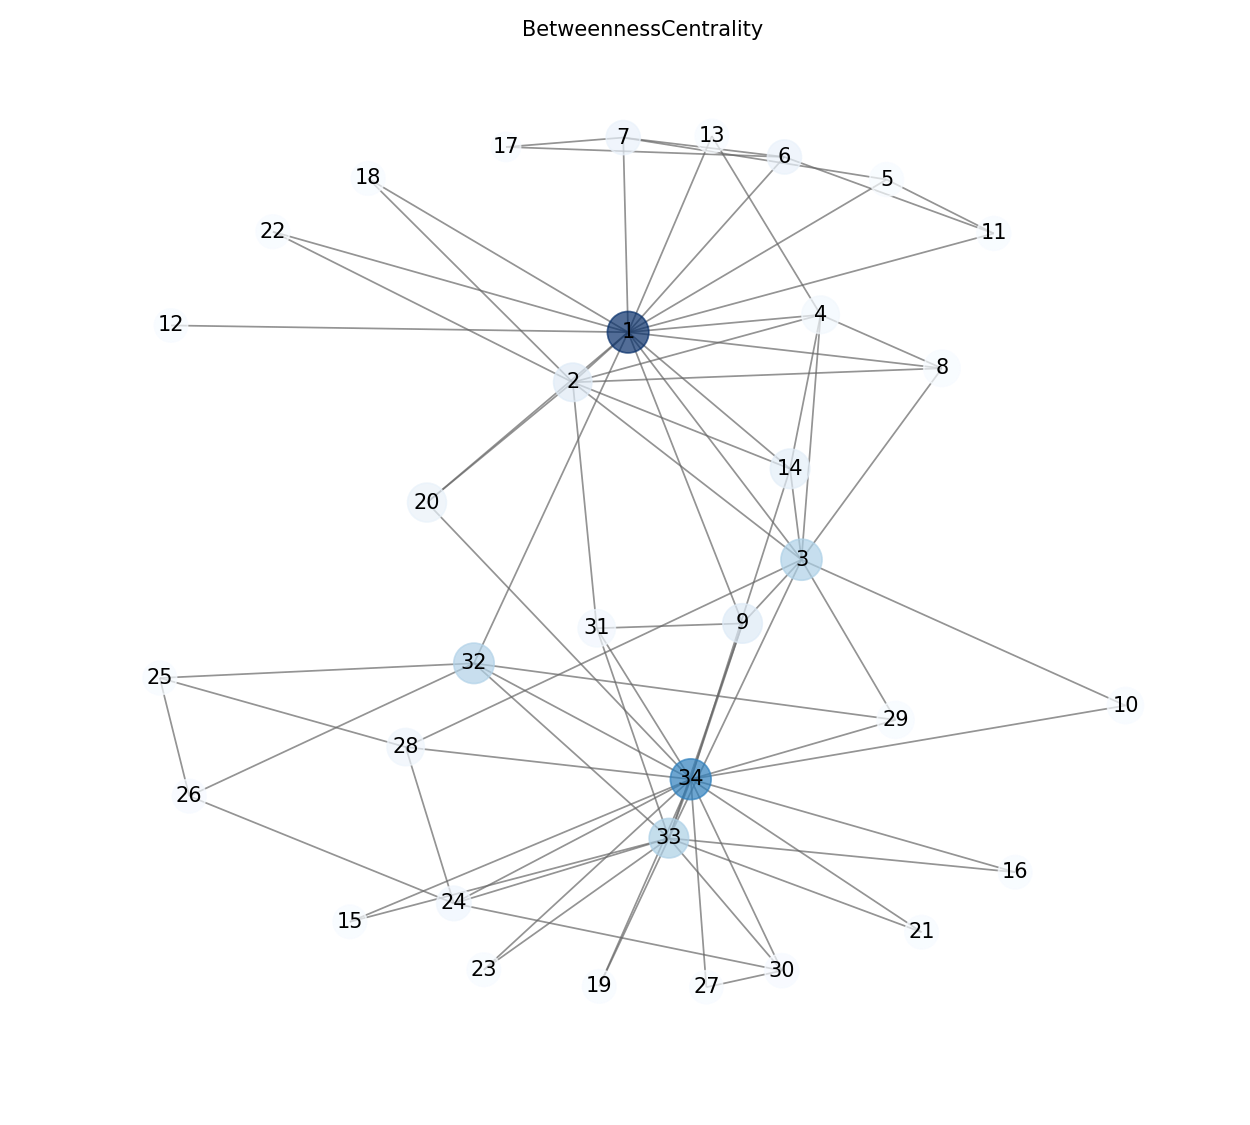

In [24]:
%matplotlib notebook
plt.figure(figsize=(10,9))
nx.draw_networkx(G, pos, node_size=node_size1, 
                 node_color=node_color2, alpha=0.7, with_labels= True, 
                   edge_color='.4', cmap=plt.cm.Blues)
plt.title('BetweennessCentrality')
plt.axis('off')
plt.tight_layout();

## Computation time is a problem O(N**3) therefore
intsted of taking all the pair of nodes we can take the sample 

In [25]:
BetC=nx.betweenness_centrality(G,normalized=True,endpoints=False,k=10)
BetC_Sorted=sorted(BetC.items(),key=operator.itemgetter(1),reverse=True)[:5]
BetC_Sorted

[(1, 0.39403980278980283),
 (34, 0.310542328042328),
 (3, 0.22077155483405483),
 (33, 0.13125120250120248),
 (32, 0.10485224266474266)]

In [26]:
G.nodes()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [27]:
#betweeness centrality on the basis of Subset``
BSubset=nx.betweenness_centrality_subset(G,[1,2,3,4,19,5],[34,33,27,29],normalized=True)#G,Source Node s,Target node t
 

In [28]:
BSubset

{1: 0.003787878787878788,
 2: 0.0,
 3: 0.004892676767676767,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0018713924963924963,
 10: 0.0002931096681096681,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0037653318903318905,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0015782828282828283,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0002931096681096681,
 29: 0.0002931096681096681,
 30: 0.00013528138528138528,
 31: 0.0011047979797979798,
 32: 0.002525252525252525,
 33: 0.00042839105339105343,
 34: 0.006493506493506494}

#### Edge betweeness centrality

In [29]:
B_edge=nx.edge_betweenness_centrality(G)

In [30]:
edge_width=[]
for v in B_edge:
    edge_width.append(19*B_edge[v])
Centrality=nx.betweenness_centrality(G)
node_size3=[]
for v in Centrality:
    node_size3.append(1000*Centrality[v])
    

<IPython.core.display.Javascript object>


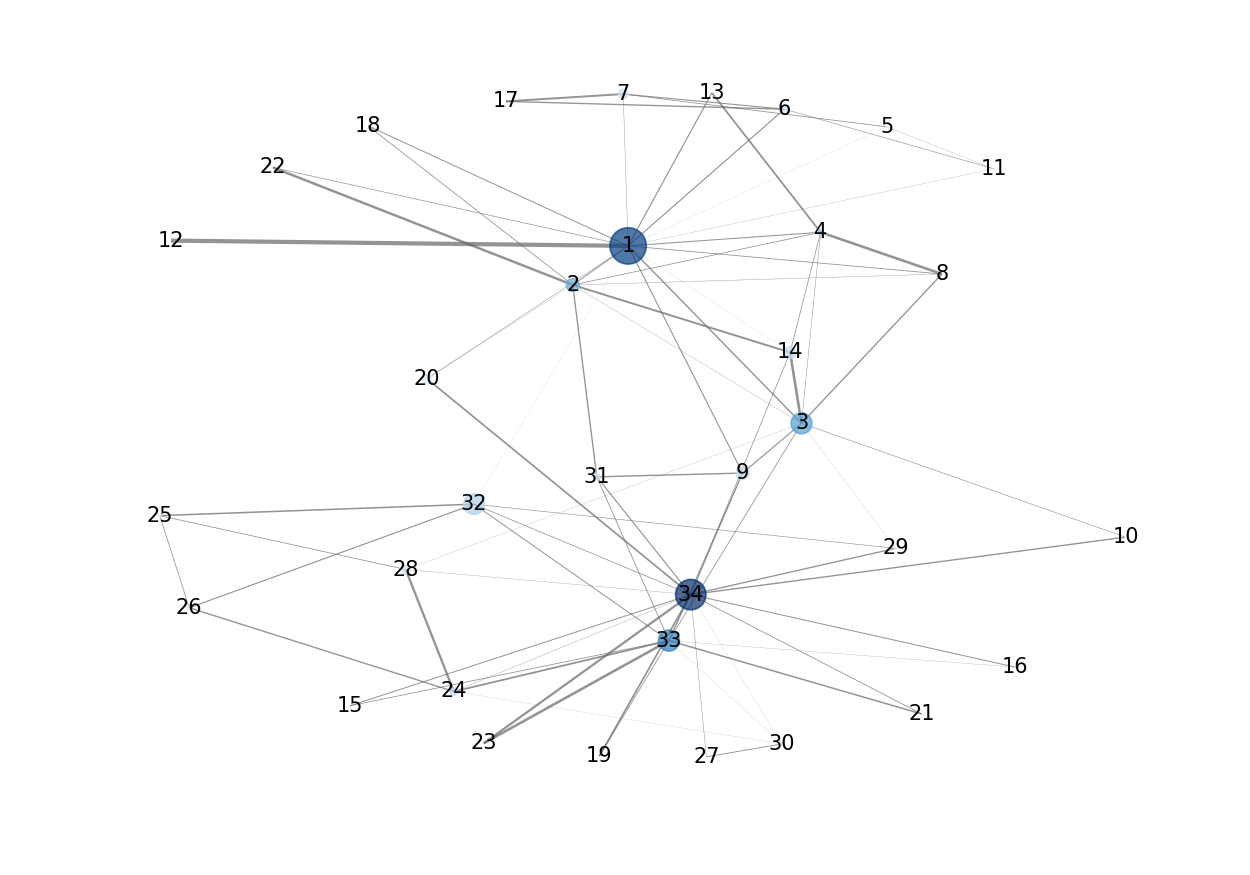

In [31]:
plt.figure(figsize=(10,7))

node_color3 = [G.degree(v) for v in G]
 
nx.draw_networkx(G, pos, node_size=node_size3, 
                 node_color=node_color3, alpha=0.7, with_labels=True, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)
plt.axis('off')
plt.tight_layout();


#  Page Rank to measure the importance ot Centrality

 <b style='color:Red '> Its is Especially </b> <div style="color:Blue">for directed graph
 <br>Important nodes are those which have many inlinks from important nodes.</div>
 <img src="images/summary.png">


###  working
<img src="images/page_rank1.png" style="height:300px"><br>
<img src="images/page_rank.png" style="height:300px"><br>
Value of K increases the <b> page rank importance value converges

In [32]:
 pr = nx.pagerank(G, alpha=0.9)

In [33]:
import pr

ImportError: No module named 'pr'

## Treat Page rank algorithm as a random walker
<img src="images/problem.png" style="height:300px">
<br><b>fixing this problem by scaled page rank</b>

<img src="images/page_rank_problem.png" style="height:300px">

<img src="images/scale_pr.png" style="height:300px">

## HUB calculation:outdegree node,AUTH calculation:indegree

<img src="images/hub_authorities.png" style="height:300px">
<img src="images/HItsalgo.png" style="height:300px">
<img src="images/hits_algo1.png" style="height:300px">

<img src="images/hub3.png" style="height:300px">

nx.hits(G)#output hub and authority score

##### Comparison of centrality measures

<img src="images/comaprison.png" style="height:350px">

# summary
<<img src="images/summary_impoortance.png" style="height:300px">